<div style="text-align: center; background-color: skyblue; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 15px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    INTRODUCTION TO DATA SCIENCE<br>
    @ FIT-HCMUS, VNU-HCM<br>
    FINAL PROJECT 🏫
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    THE ANALYSIS OF THE MOBILE PHONE MARKET AT MOBILE CITY STORE
</div>
<style>
    div:hover {
        transform: scale(1.05);
        box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.3);
    }
</style>


---

<div style="text-align: center; background-color: #ADD8E6; font-family: 'Times New Roman', serif; color: white; padding: 25px; font-size: 20px; font-weight: bold; border-radius: 10px; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2); transition: all 0.3s ease;">
    DATA MODELING
</div>
<style>
    div:hover {
        opacity: 0.8;
    }
</style>

**Người thực hiện**: Lê Nguyễn Gia Bảo

**MSSV**: 22120023


---

## Problem:
Dự đoán

## Model: `Stochastic Gradient Descent (SGD)` - Linear Regression

### Reason for Selection:

- `Linear Regression` được lựa chọn vì tính đơn giản, hiệu quả và phù hợp với các tập dữ liệu cỡ trung bình như bộ dữ liệu của đồ án này (gần 8700 mẫu).

- `Stochastic Gradient Descent`:
    - Là một phương pháp tối ưu hóa trong Machine Learning. 
    - Nó là một biến thể của **Gradient Descent**, **SGD** thực hiện cập nhật trọng số trên từng mẫu dữ liệu một cách ngẫu nhiên, giúp tăng tốc độ hội tụ và tránh bẫy cục bộ.

### Import:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import time
import csv

### Read data from file CSV:

In [2]:
df = pd.read_csv("../../data/processed_data.csv")

In [3]:
df.sample(3)

,Unnamed: 0,ten,loai_dien_thoai,thoi_gian_bao_hanh,danh_gia,so_luong_binh_luan,duong_dan,mau_sac,gia_moi,gia_cu,...,la_dien_thoai_cu,kich_thuoc_man_hinh,tan_so_quet,do_sang_man_hinh,loai_man_hinh,so_the_sim,loai_pin,cong_suat_sac,do_phan_giai_cam_sau,do_phan_giai_cam_truoc
7083,7083,Điện thoại Samsung Galaxy S23 cũ (Snapdragon 8...,Samsung Cũ,6.0,5.0,78,https://mobilecity.vn/dien-thoai/samsung-galax...,Trắng,8450000.0,12450000.0,...,True,6.1,120.0,1200.0,AMOLED,2,Li-Ion,25.0,"[50.0, 10.0, 12.0]",[12.0]
6129,6129,Điện thoại Samsung Galaxy Note 9 cũ (128GB - 5...,Samsung Cũ,6.0,4.9,805,https://mobilecity.vn/samsung/samsung-galaxy-n...,Đen,3950000.0,4950000.0,...,True,6.4,NaN,NaN,AMOLED,2,Li-Ion,15.0,"[12.0, 12.0]",[8.0]
3507,3507,Điện thoại Sony Xperia 1 IV (1 Mark 4) 5G (Sna...,Sony,12.0,5.0,3,https://mobilecity.vn/dien-thoai/sony-xperia-1...,Tím,23950000.0,24990000.0,...,False,6.5,120.0,NaN,OLED,2,Li-Po,30.0,"[12.0, 12.0, 12.0, 0.3]",[12.0]


### Prepare for model creation (Data Preprocessing):

- Xoá đi cột `Unnamed: 0`:

In [3]:
df = df.drop(columns=["Unnamed: 0"])

- Các thuộc tính của bộ dữ liệu:

In [5]:
df.columns.to_list()

['ten',
 'loai_dien_thoai',
 'thoi_gian_bao_hanh',
 'danh_gia',
 'so_luong_binh_luan',
 'duong_dan',
 'mau_sac',
 'gia_moi',
 'gia_cu',
 'he_dieu_hanh',
 'cpu',
 'ram',
 'bo_nho_trong',
 'dung_luong_pin',
 'thiet_ke',
 'hang_dien_thoai',
 'la_dien_thoai_cu',
 'kich_thuoc_man_hinh',
 'tan_so_quet',
 'do_sang_man_hinh',
 'loai_man_hinh',
 'so_the_sim',
 'loai_pin',
 'cong_suat_sac',
 'do_phan_giai_cam_sau',
 'do_phan_giai_cam_truoc']

- Thuộc tính mục tiêu của vấn đề đã đặt ra là `gia_moi`.

- Kiểm tra dữ liệu thiếu ở mỗi cột:

In [6]:
def missing_ratio(col):
    return (col.isna().mean() * 100).round(1)

In [7]:
missing_ratio_df = df.apply(missing_ratio).sort_values(ascending=False)
missing_ratio_df = missing_ratio_df.reset_index()
missing_ratio_df.columns = ["Features", "Missing ratio"]
missing_ratio_df

,Features,Missing ratio
0,gia_cu,41.3
1,do_sang_man_hinh,40.2
2,tan_so_quet,24.3
3,loai_pin,24.1
4,gia_moi,17.5
5,cong_suat_sac,5.6
6,kich_thuoc_man_hinh,3.9
7,loai_man_hinh,3.8
8,bo_nho_trong,3.5
9,mau_sac,3.3


- Nhận thấy rằng cột `gia_cu` và `do_sang_man_hinh` có tỉ lệ các giá trị thiếu rất cao so với phần còn lại. Ta sẽ loại bỏ 2 cột này:

In [4]:
df = df.drop(columns=["gia_cu", "do_sang_man_hinh"])

- Xử lý giá trị thiếu trong các cột thuộc tính: Để giữ nguyên tính thực tế, ta sẽ loại bỏ tất cả các dòng có ít nhất một giá trị thiếu, không thực hiện việc điền giá trị thiếu ở các cột thuộc tính.

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4361 entries, 18 to 8355
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ten                     4361 non-null   object 
 1   loai_dien_thoai         4361 non-null   object 
 2   thoi_gian_bao_hanh      4361 non-null   float64
 3   danh_gia                4361 non-null   float64
 4   so_luong_binh_luan      4361 non-null   int64  
 5   duong_dan               4361 non-null   object 
 6   mau_sac                 4361 non-null   object 
 7   gia_moi                 4361 non-null   float64
 8   he_dieu_hanh            4361 non-null   object 
 9   cpu                     4361 non-null   object 
 10  ram                     4361 non-null   float64
 11  bo_nho_trong            4361 non-null   float64
 12  dung_luong_pin          4361 non-null   float64
 13  thiet_ke                4361 non-null   object 
 14  hang_dien_thoai         4361 non-null  

- Mối tương quan giữa `gia_moi` và các thuộc tính còn lại:
    - Chuyển đổi các giá trị phân loại thành các số nguyên.
    - Tính toán tương quan.

In [7]:
df1 = df.copy()

In [8]:
le = LabelEncoder()

cat_cols = df1.select_dtypes(exclude=np.number).columns
for col in cat_cols:
    df1[col] = le.fit_transform(df1[col])

df1.sample(3)

,ten,loai_dien_thoai,thoi_gian_bao_hanh,danh_gia,so_luong_binh_luan,duong_dan,mau_sac,gia_moi,he_dieu_hanh,cpu,...,hang_dien_thoai,la_dien_thoai_cu,kich_thuoc_man_hinh,tan_so_quet,loai_man_hinh,so_the_sim,loai_pin,cong_suat_sac,do_phan_giai_cam_sau,do_phan_giai_cam_truoc
2886,186,11,12.0,5.0,19,175,14,14450000.0,5,233,...,16,0,6.78,120.0,2,2,2,120.0,91,10
18,453,12,12.0,5.0,5,402,89,2450000.0,3,49,...,24,0,6.74,90.0,1,2,1,18.0,45,21
2970,61,5,12.0,5.0,0,70,89,14250000.0,3,175,...,9,0,6.90,144.0,0,2,1,30.0,119,16


In [9]:
corr_matrix = df1.corr()
corr_with_target = corr_matrix["gia_moi"].sort_values(ascending=False)
corr_with_target

gia_moi                   1.000000
bo_nho_trong              0.530113
he_dieu_hanh              0.472005
ram                       0.459341
kich_thuoc_man_hinh       0.280028
tan_so_quet               0.185614
thoi_gian_bao_hanh        0.128558
cpu                       0.071326
cong_suat_sac             0.070175
danh_gia                  0.009495
loai_man_hinh             0.005648
dung_luong_pin           -0.042241
mau_sac                  -0.053099
do_phan_giai_cam_sau     -0.077064
do_phan_giai_cam_truoc   -0.159481
so_luong_binh_luan       -0.168423
loai_pin                 -0.169000
so_the_sim               -0.175485
thiet_ke                 -0.200999
loai_dien_thoai          -0.216619
la_dien_thoai_cu         -0.223336
ten                      -0.252537
hang_dien_thoai          -0.264105
duong_dan                -0.385251
Name: gia_moi, dtype: float64

- Loại bỏ các thuộc tính có hệ số tương quan yếu hoặc âm mạnh đối với `gia_moi`:
    - Loại bỏ **duong_dan**, **do_phan_giai_cam_truoc**, **loai_pin**, **so_luong_binh_luan**, **la_dien_thoai_cu**, **thiet_ke**, **so_the_sim**, **ten**, **loai_dien_thoai**, **cpu**, **mau_sac**.
    - **hang_dien_thoai** dù là cột có độ tương quan âm tuy nhiên có vẻ có ít nhiều sự ảnh hưởng đến giá thành sản phẩm của mỗi hãng, hay còn gọi là "tiền thương hiệu". Vì vậy ta sẽ giữ lại thuộc tính này.

In [10]:
df = df.drop(columns=['duong_dan', 'do_phan_giai_cam_truoc', 'loai_pin', 'so_luong_binh_luan', 'la_dien_thoai_cu', 'thiet_ke', 'so_the_sim', 'ten', 'loai_dien_thoai', 'cpu', 'mau_sac'])

- Các cột còn lại của bộ dữ liệu:

In [15]:
df.columns.to_list()

['thoi_gian_bao_hanh',
 'danh_gia',
 'gia_moi',
 'he_dieu_hanh',
 'ram',
 'bo_nho_trong',
 'dung_luong_pin',
 'hang_dien_thoai',
 'kich_thuoc_man_hinh',
 'tan_so_quet',
 'loai_man_hinh',
 'cong_suat_sac',
 'do_phan_giai_cam_sau']

- Từ các thuộc tính đã được lọc ra, `gia_moi` là thuộc tính mục tiêu, còn lại là các đặc trưng quan trọng và cần thiết để dự đoán thuộc tính mục tiêu này.

In [11]:
selected_features = ['thoi_gian_bao_hanh', 'danh_gia', 'he_dieu_hanh', 'ram', 
                     'bo_nho_trong', 'dung_luong_pin', 'hang_dien_thoai', 'kich_thuoc_man_hinh', 
                     'tan_so_quet', 'loai_man_hinh', 'cong_suat_sac', 'do_phan_giai_cam_sau']

### Create model:

In [12]:
num_features = ['thoi_gian_bao_hanh', 'danh_gia', 'ram', 'bo_nho_trong', 'dung_luong_pin', 'kich_thuoc_man_hinh', 'tan_so_quet', 'cong_suat_sac']
cat_features = ['he_dieu_hanh', 'hang_dien_thoai', 'loai_man_hinh', 'do_phan_giai_cam_sau']

#### Tạo DataFrame X và y:

In [13]:
X = df.drop(columns=["gia_moi"])
y = df["gia_moi"]

#### Chia dữ liệu thành tập huấn luyện và tập kiểm tra:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

#### Tạo các bộ biến đổi cho dữ liệu số và dữ liệu phân loại:

In [15]:
num_transformer = StandardScaler()

cat_transformer = OneHotEncoder(handle_unknown="ignore", sparse=False, drop="first")

#### Tạo bộ tiền xử lý kết hợp các bộ biến đổi:

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)

#### Tạo pipeline kết hợp bộ tiền xử lý và mô hình hồi quy:

In [19]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', SGDRegressor())])

#### Tạo grid các tham số để tìm kiếm tối ưu cho mô hình hồi quy:

In [23]:
parameters_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1],
    'regressor__learning_rate': ['constant', 'optimal', 'adaptive'],
    'regressor__max_iter': [500, 1000, 1500]
}

#### Tìm kiếm tham số tối ưu cho mô hình:

In [24]:
grid_search = GridSearchCV(model, parameters_grid, cv=5, scoring='neg_mean_squared_error')

#### Huấn luyện mô hình với GridSearchCV trên tập dữ liệu huấn luyện:

In [25]:
import warnings
warnings.filterwarnings('ignore') # Bỏ qua các cảnh báo

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['thoi_gian_bao_hanh',
                                                                          'danh_gia',
                                                                          'ram',
                                                                          'bo_nho_trong',
                                                                          'dung_luong_pin',
                                                                          'kich_thuoc_man_hinh',
                                                                          'tan_so_quet',
                                                                          'cong_suat_sac']),
                              

#### Tham số tốt nhất tìm được:

In [26]:
grid_search.best_params_

{'regressor__alpha': 0.001,
 'regressor__learning_rate': 'adaptive',
 'regressor__max_iter': 1000}

### Model Training:

#### Huấn luyện mô hình với tham số tốt nhất & tính thời gian:

In [27]:
best_params = {'alpha': 0.001,
                'learning_rate': 'adaptive',
                'max_iter': 500}

In [28]:
best_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', SGDRegressor(**best_params))])

In [29]:
time_start = time.time()
best_model.fit(X_train, y_train)
time_end = time.time()

In [30]:
training_time = time_end - time_start
print(f"Training time: {training_time:.2f} seconds")

Training time: 0.55 seconds


### Model Evaluation:

#### Dự đoán giá trị đầu ra trên tập dữ liệu kiểm tra bằng mô hình tốt nhất:

In [31]:
y_pred = best_model.predict(X_test)

#### Tính toán các chỉ số đánh giá mô hình:

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [33]:
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2: {r2:.2f}")

Mean Absolute Error: 2059671.39
Mean Squared Error: 7641510839758.28
R^2: 0.85


#### Visualization:

#### Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán:

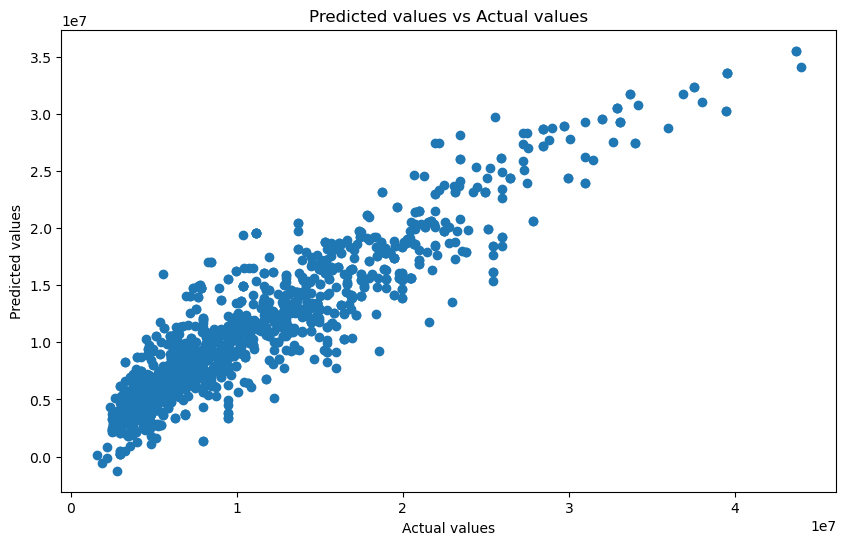

In [34]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted values vs Actual values')

plt.show()

#### Ghi kết quả đánh giá mô hình vào file CSV:

In [35]:
model_evaluation = ['SGDRegressor', training_time, mae, mse, r2]
with open('evaluation CSV/model_1_evaluation.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(model_evaluation)